### Сборный проект - 1: Исследование компьютерных игр

#### Цель проекта
Выявить закономерности, определяющие успешность компьютерной игры.

#### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
#импортируем библиотеки

In [2]:
games = pd.read_csv('/datasets/games.csv')
#прочитаем csv-файл

In [3]:
games.head(10) #посмотрим первые строки

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info() #общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов, необходимо названия привести к snake_case, поменять тип данных в 3, 9 и 10. 
В данных есть пропуски, потому что различается количество значений. 

### Подготовка данных

In [5]:
games.columns #перечень названий столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
games.columns = games.columns.str.lower() #приведем названия столбцов к нижнему регистру

In [7]:
games.isna().sum() #посмотрим пропуски

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
games.isna().mean().round(2) * 100 #пропуски в процентном соотношении

name                0.0
platform            0.0
year_of_release     2.0
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.0
user_score         40.0
rating             40.0
dtype: float64

Видим пропуски значений в названии, оценках и рейтинге. 
Удалим строки без названия игры, их всего 2, на общий анализ не повлияют, скорее всего человеческий фактор.

Пропуски значений в столбце года выхода оставим, заполнение средним или медианным значением не даст информативности. 

Отсутствие значений в оценках критиков и пользователей оставим, игру могли не оценивать, либо произошла ошибка при хранении или выгрузке данных. Сообщим коллегам.

Возможно, пропуски в последнем столбце связаны с тем, что организация ESRB была основана в 1994 году, поэтому отсутствуют данные по играм, которые вышли раньше.

In [9]:
games = games.dropna(subset=['name']) #удалим строки, в которых отсутствует название игры

In [10]:
games.duplicated().sum() #посмотрим дубликаты

0

In [11]:
duplicated_rows = games[games.duplicated(['name', 'platform', 'year_of_release'])]
#посмотрим неявные дубликаты

In [12]:
duplicated_rows.drop_duplicates(keep=False) #удалим неявные дубликаты

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [13]:
games.critic_score.unique() #посмотрим оценки критиков

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [14]:
games.user_score.unique() 
#посмотрим оценки пользователей, ожидался тип float, 
#в нашем случае object из-за "tbd" (to be determined = будет определено)

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
games['user_score'] = games['user_score'].replace('tbd', 'nan').astype(float) 
#заменим 'tbd', заполним пропуски, приведем к вещественному

In [16]:
games['user_score'].unique() #проверим на пустые значения

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [17]:
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int) 
#заполним пропуски 0, поменяем значения года выхода игры на целочисленные

In [18]:
games.info() #проверим внесенные измения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [19]:
games.rating.unique() #посмотрим значение в столбце рейтинга от организации ESRB

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

По данным из Википедии:

- «EC» («Early childhood») — «Для детей младшего возраста»: игра подходит для детей от 3 лет

- «E» («Everyone») — «Для всех»: содержание вполне подходит для всех возрастов (ранее с 6 лет), первоначально "K-A" ("Kids to Adults")

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Рейтинг был принят ESRB 2 марта 2005 года.

- «T» («Teen») — «Подросткам»: игра подходит для лиц от 13 лет.

- «M» («Mature») — «Для взрослых»: материалы игры не подходят для лиц младше 17 лет. 

- «AO» («Adults Only 18+») — «Только для взрослых».

- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.


Рейтинг "К-А" можем перезаписать на "Е", так как это один и тот же возрастной ценз.

In [20]:
games['rating'] = games['rating'].replace('K-A','E') #произведем замену

In [21]:
games['rating'] = games['rating'].fillna('unknown') #заполним пропуски на unknown

In [22]:
games.rating.unique() #проверим

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [23]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
#посчитаем суммарные продажи по всех регионах и запишем в отдельный столбец

In [24]:
games.head(10) #проверим добавление столбца

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px">
 Удалили строки без названия игры, их всего 2, на общий анализ не повлияют, скорее всего человеческий фактор. 
Провели проверку на дубликаты.

Заменили тип данных на целочисленный в столбцах оценки критиков и год выхода.
Значение в оценке пользователей заменили на дробные числа, tbd заменили на пустые значения.

Пропуски значений в столбце года выхода оставим, заполнение средним или медианным значением не даст информативности. Отсутствие значений в оценках критиков и пользователей оставим, игру могли не оценивать, либо произошла ошибка при хранении или выгрузке данных. Сообщим коллегам.

Возможно, пропуски в последнем столбце связаны с тем, что организация ESRB была основана в 1994 году, поэтому отсутствуют данные по играм, которые вышли раньше. Заполнили эти пропуски значением "Unknown". Сделали расшифровку по данным, объединили 2 группы в 1 (раннее и новое название для одной возрастной группы).

Добавили столбец с общими продажами по каждой игре.

### Исследовательский анализ данных

**Год выхода**

In [25]:
games['year_of_release'].value_counts() #посмотрим количество игр в каждый год

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

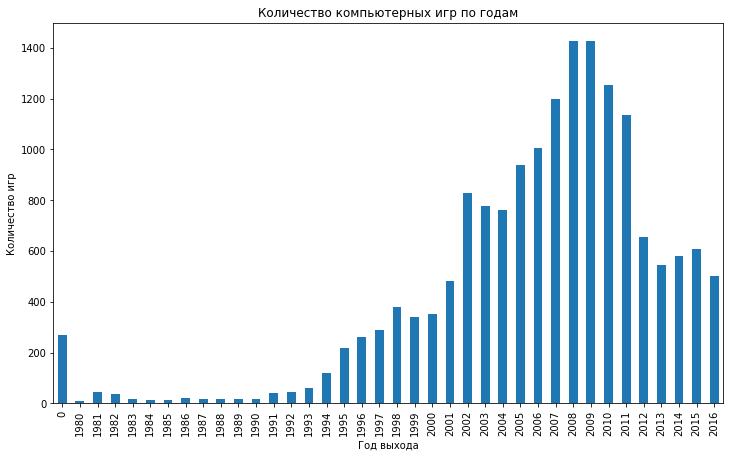

In [26]:
games.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (12,7),
                                                        title='Количество компьютерных игр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр')
plt.show() #построим диаграмму

На графике видим рост с 1997 года, больше всего игр выходило в 2008 и 2009 годах.<br> 
После идет плавное снижение, в 2011  падение более чем в 2 раза от пика.

In [27]:
games_actual = games[games['year_of_release'] >= 1997] #рассмотрим период с 1997 года

**Продажи по платформам**

In [28]:
platform_sales = (games
                  .pivot_table(index='platform',values = 'total_sales',aggfunc = sum)
                  .sort_values(by='total_sales', ascending=False)
                  .head(10)
                 )
#создадим сводную таблицу по общим продажам

In [29]:
platform_sales

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Видим явного лидера по продажам - PS2, посмотрим как менялись продажи в зависимости от года. Рассмотрим данные с PS, здесь заметен рост, последние 4 платформы из нашего списка учитывать не будем (сравнительно небольшие продажи).

In [30]:
leader_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [31]:
leader_platforms_year = (games_actual
                      .loc[games['platform'].isin(leader_platforms)]
                      .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                      .reset_index()
                 )

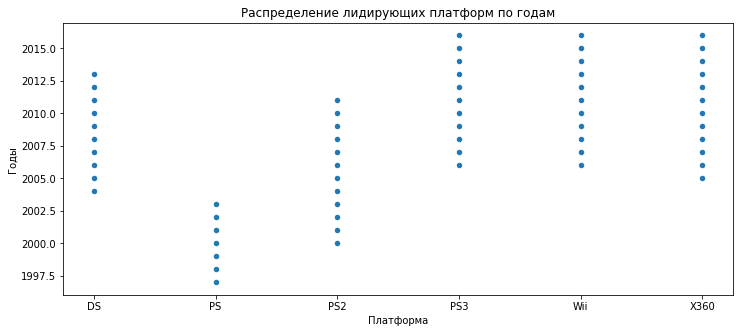

In [32]:
leader_platforms_year.plot(x='platform', y='year_of_release', 
            kind ='scatter', alpha = 1, figsize=(12,5),
        title='Распределение лидирующих платформ по годам')
plt.xlabel('Платформа')
plt.ylabel('Годы')
plt.show() #построим диаграмму рассеивания 

***В среднем срок жизни платформы около 10 лет, небольшой срок PS объясним пришедшей ей на смену PS2.***

----

**Для прогноза на 2017 год возьмем данные за последние 2-3 года.**

In [33]:
actual_period=(games
               .query('year_of_release>=2013')
               .sort_values(by='total_sales', ascending=False)
              )#отсортируем данные за последние 2-3 года

In [34]:
actual_period #посмотрим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16264,Worms: WMD,XOne,2016,Action,0.01,0.00,0.00,0.00,75.0,8.1,E10+,0.01
16267,The Book of Unwritten Tales 2,WiiU,2016,Adventure,0.00,0.01,0.00,0.00,NaN,NaN,T,0.01
16270,Hyakka Yakou,PSV,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16273,Doki-Doki Universe,PSV,2013,Adventure,0.00,0.01,0.00,0.00,66.0,5.7,E10+,0.01


In [35]:
actual_period.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum') \
            .sort_values(by='total_sales', ascending =False) 
#построим сводную таблицу по общим продажам каждой платформы

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


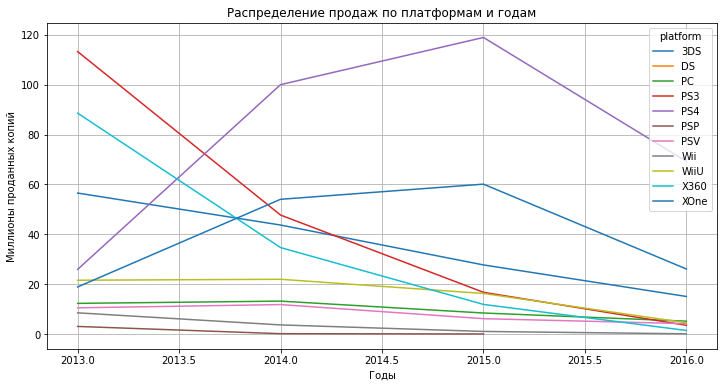

In [36]:
top_platforms = (actual_period
                 .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
                 .plot(grid=True, figsize=(12, 6))
                )
plt.title('Распределение продаж по платформам и годам')
plt.xlabel('Годы')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим график по годам

На графике видим тенденцию к снижению продаж по всем платформам, в 2016 году можем рассматривать PS4, XOne и 3DS, как потенциально прибыльные.

----

***Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.***

[(0.0, 2.0)]

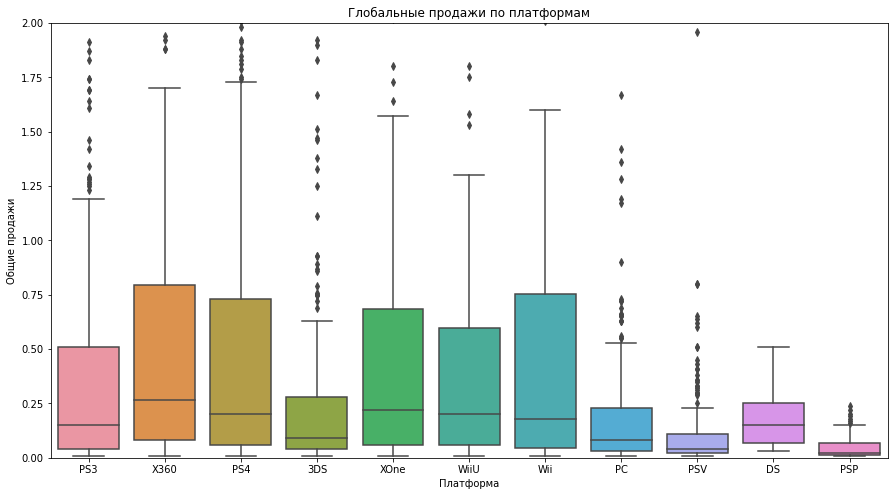

In [37]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=actual_period,x='platform',y='total_sales')
plt.title('Глобальные продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
ax.set(ylim=(0,2))

Среднее сильно отличается от медианы. Видим множество выбросов, возможно, некоторых игры игроки особенно ждали.
Лидер X360, далее Wii, похожие результаты у PS4 и XOne, замыкает рейтинг топ-5 платформа WiiU.

***Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков.***

In [38]:
actual_PS4 = actual_period.query('platform=="PS4"')

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

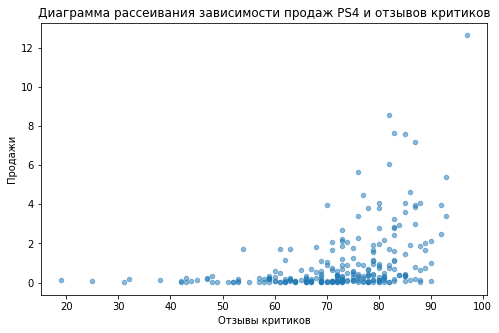

In [39]:
actual_PS4.plot(x='critic_score', y='total_sales', 
            kind ='scatter', alpha = 0.5, figsize=(8,5),
        title='Диаграмма рассеивания зависимости продаж PS4 и отзывов критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show() #построим диаграмму рассеивания 

In [40]:
print('Корреляция между продажами PS4 и отзывами критиков:',actual_PS4['total_sales'].corr(actual_PS4['critic_score'])) 

Корреляция между продажами PS4 и отзывами критиков: 0.406567902061781


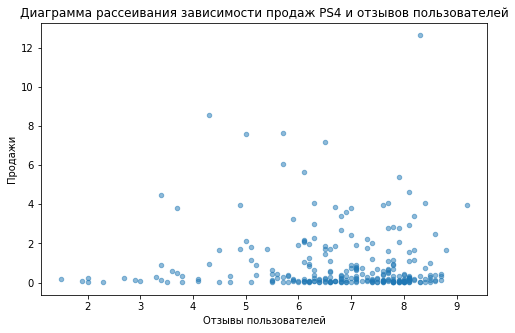

In [41]:
actual_PS4.plot(x='user_score', y='total_sales', 
            kind ='scatter', alpha = 0.5, figsize=(8,5),
        title='Диаграмма рассеивания зависимости продаж PS4 и отзывов пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show() #построим диаграмму рассеивания 

In [42]:
print('Корреляция между продажами PS4 и отзывами пользователей:', actual_PS4['total_sales'].corr(actual_PS4['user_score']))

Корреляция между продажами PS4 и отзывами пользователей: -0.03195711020455638


Есть средняя положительная 0.4 корреляция между продажами PS4 и отзывами критиков, слабоотрицательная -0.03 между продажами PS4 и отзывами пользователей.
Таким образом нет связи между отзывами пользователей и продажами PS4, отзывы критиков имеют большее значение.

***Посмотрим влияние отзывов пользователей и критиков на продажи платформ X360, XOne и PS3.***

In [43]:
actual_X360 = actual_period.query('platform=="X360"')
actual_XOne = actual_period.query('platform=="XOne"')
actual_PS3 = actual_period.query('platform=="PS3"') 

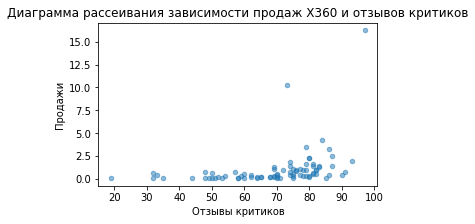

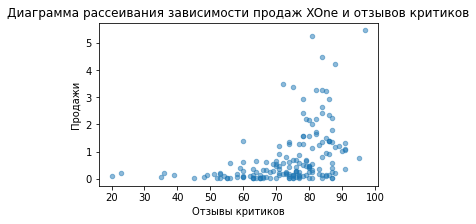

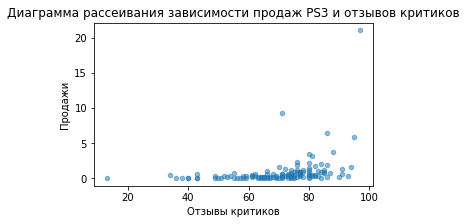

In [44]:
actual_X360.plot(x='critic_score', y='total_sales', 
            kind ='scatter', alpha = 0.5, figsize=(5,3),
        title='Диаграмма рассеивания зависимости продаж X360 и отзывов критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show() #построим диаграмму рассеивания 

actual_XOne.plot(x='critic_score', y='total_sales', 
            kind ='scatter', alpha = 0.5, figsize=(5,3),
        title='Диаграмма рассеивания зависимости продаж XOne и отзывов критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show() #построим диаграмму рассеивания 

actual_PS3.plot(x='critic_score', y='total_sales', 
            kind ='scatter', alpha = 0.5, figsize=(5,3),
        title='Диаграмма рассеивания зависимости продаж PS3 и отзывов критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show() #построим диаграмму рассеивания 

In [45]:
print('Корреляция между продажами X360 и отзывами критиков:', actual_X360['total_sales'].corr(actual_X360['critic_score'])) 


Корреляция между продажами X360 и отзывами критиков: 0.35034454602286635


In [46]:
print('Корреляция между продажами XOne и отзывами критиков:', actual_XOne['total_sales'].corr(actual_XOne['critic_score'])) 

Корреляция между продажами XOne и отзывами критиков: 0.4169983280084017


In [47]:
print('Корреляция между продажами PS3 и отзывами критиков:',actual_PS3['total_sales'].corr(actual_PS3['critic_score']))

Корреляция между продажами PS3 и отзывами критиков: 0.33428533933719196


Корреляция между продажами платформ X360, XOne, PS3 и отзывами критиков средняя положительная. <br>
Заметнее у XOne, чуть меньше X360 и PS3.

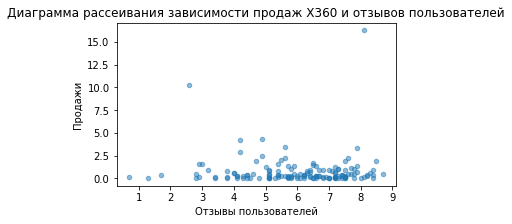

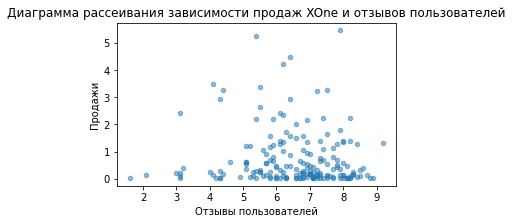

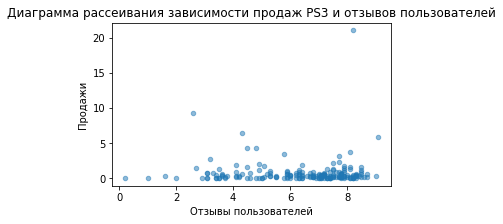

In [48]:
actual_X360.plot(x='user_score', y='total_sales', 
            kind ='scatter', alpha = 0.5, figsize=(5,3),
        title='Диаграмма рассеивания зависимости продаж X360 и отзывов пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show() #построим диаграмму рассеивания 

actual_XOne.plot(x='user_score', y='total_sales', 
            kind ='scatter', alpha = 0.5, figsize=(5,3),
        title='Диаграмма рассеивания зависимости продаж XOne и отзывов пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show() #построим диаграмму рассеивания 

actual_PS3.plot(x='user_score', y='total_sales', 
            kind ='scatter', alpha = 0.5, figsize=(5,3),
        title='Диаграмма рассеивания зависимости продаж PS3 и отзывов пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show() #построим диаграмму рассеивания 

In [49]:
print('Корреляция между продажами X360 и отзывами пользователей:', actual_X360['total_sales'].corr(actual_X360['user_score'])) 

Корреляция между продажами X360 и отзывами пользователей: -0.011742185147181347


In [50]:
print('Корреляция между продажами XOne и отзывами пользователей:', actual_XOne['total_sales'].corr(actual_XOne['user_score'])) 

Корреляция между продажами XOne и отзывами пользователей: -0.0689250532827941


In [51]:
print('Корреляция между продажами PS3 и отзывами пользователей:', actual_PS3['total_sales'].corr(actual_PS3['user_score'])) 

Корреляция между продажами PS3 и отзывами пользователей: 0.002394402735756699


Корреляция между продажами платформ X360, XOne, PS3 и отзывами пользователей слабая отрицательная.

----

<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px"> 
Проанализировали влияние отзывов критиков и пользователей на продажи игр на платформах XOne, X360 и PS3.
    
Корреляция между продажами платформ и отзывами пользователей слабая отрицательная, из чего можем сказать, что отзывы пользователей на продажи не влияют.
    
Корреляция между продажами платформ X360, XOne, PS3 и отзывами критиков средняя положительная. Отметим большее влияние на платформу XOne.

----

***Игры по жанрам*** 

Посмотрим на общее распределение игр по жанрам

In [52]:
games['genre'].sort_values(ascending = True).unique() #посмотрим название жанров

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

*Описание жанров*

Action - Имеет акцент на борьбе, включает в себя прохождение определённых уровней для достижения битвы с боссами <br>
Adventure - Делает упор на головоломки без высокой активности <br>
Fighting - Основное внимание уделяется бою один на один <br>
Misc - Мультижанровый, разное <br>
Platform - Основное внимание уделяется прыжкам или сложностям навигации, часто включают в себя элементы игр-экшенов <br>
Puzzle - Сосредоточена на решение абстрактных головоломок <br>
Racing - Соревнованиями по времени между персонажами или транспортными средствами <br>
Role-playing - Сосредоточена на решении проблем, взаимодействии с неигровыми персонажами, участии в боях, статистическом развитии персонажа <br>
Shooter - основой игрового процесса  является сражение с использованием оружия <br>
Simulation - Имитирующее определённые направления деятельности <br>
Sports - Отражают соревнования по существующим видам спорта <br>
Strategy - С акцентом на тактические управление ресурсами и территорией против оппонента

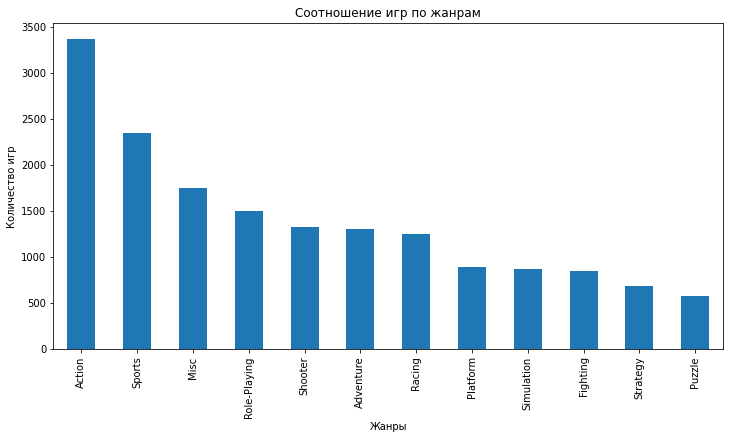

In [53]:
ax = games['genre'].value_counts().plot.bar(figsize=(12,6),title = 'Соотношение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество игр')
plt.show() #построим столбчатую диаграмму

In [54]:
games['genre'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' #процентное соотношение игр

Action          20.2%
Sports          14.0%
Misc            10.5%
Role-Playing     9.0%
Shooter          7.9%
Adventure        7.8%
Racing           7.5%
Platform         5.3%
Simulation       5.2%
Fighting         5.1%
Strategy         4.1%
Puzzle           3.5%
Name: genre, dtype: object

Пятую часть от общего количества (из 12 представленных жанров) занимают игры жанра Action. На втором месте жанр Sports, на третьем Misc. Puzzle занимает всего 3%.

***Продажи в зависимости от жанра***

In [55]:
genre_total = games.pivot_table(index='genre', values='total_sales', aggfunc='mean')
genre_total.sort_values('total_sales', ascending=False) #сводная таблица по жанрам и общим продажам

,total_sales
genre,
Platform,0.932173
Shooter,0.795503
Role-Playing,0.623872
Racing,0.583403
Sports,0.566980
Fighting,0.527126
Action,0.517711
Misc,0.458577
Simulation,0.446701


Возглавляют продажи игр с жанрами Platform, Shooter и Role-playing. Наименьшие продажи у жанров Puzzle, Strategy и Adventure.

Удивительно, больше всего продаж у жанра Platform, в то время как количество игр чуть более 5% от общего числа. <br>
Второе место у Shooter, составляет 8% от общего количества компьютерных игр. <br>
Лидер по количеству игр в жанре Action занимает в продажах 7 место из 12.

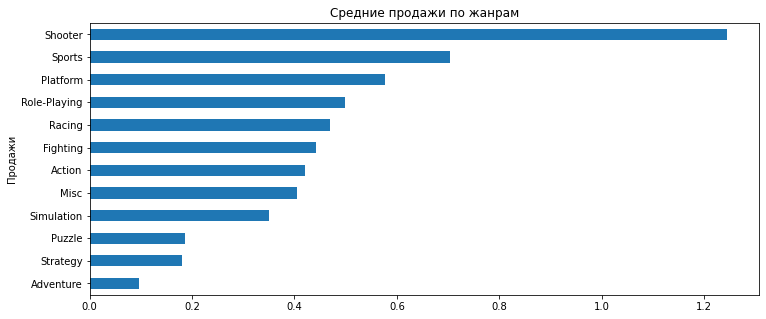

In [88]:
actual_period.groupby('genre')['total_sales'].mean().sort_values().plot(
    kind = 'barh', title = 'Средние продажи по жанрам',
    xlabel = 'Продажи',
    ylabel = 'Жанры',
    figsize = (12, 5))
plt.show()

----

#### Портрет пользователя региона

**Популярные платформы**

In [56]:
sales_region = actual_period.pivot_table(index = 'platform' , 
                                 values = ['na_sales','eu_sales','jp_sales','total_sales'], aggfunc = 'sum')
sales_region #создадим сводную таблицу продаж платформ по регионам

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
3DS,30.96,67.81,38.20,143.25
DS,0.85,0.00,0.57,1.54
PC,25.36,0.00,11.11,39.43
PS3,67.81,23.35,63.50,181.43
PS4,141.09,15.96,108.74,314.14
PSP,0.17,3.29,0.00,3.50
PSV,6.10,18.59,5.04,32.99
Wii,5.93,0.05,6.56,13.66
WiiU,19.85,10.88,29.21,64.63


In [57]:
na_sales = actual_period.pivot_table(index = 'platform' , values = 'na_sales', aggfunc = 'sum')
na = na_sales.sort_values('na_sales', ascending=False).head()
na
#ТОП-5 платформ продаж в Северной Америке (миллионы проданных копий)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


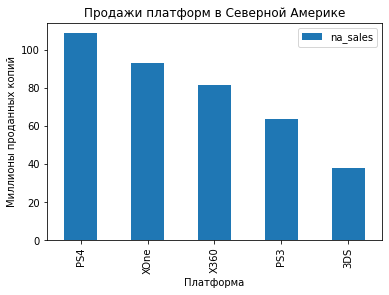

In [58]:
na.plot(kind = 'bar', title='Продажи платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим диаграмму

In [59]:
eu_sales = actual_period.pivot_table(index = 'platform' , values = 'eu_sales', aggfunc = 'sum')
eu = eu_sales.sort_values('eu_sales', ascending=False).head()
eu
#ТОП-5 платформ продаж в Европе (миллионы проданных копий)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


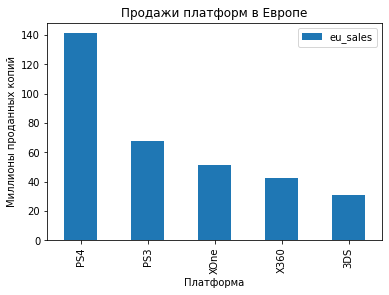

In [60]:
eu.plot(kind = 'bar', title='Продажи платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим диаграмму

In [61]:
jp_sales = actual_period.pivot_table(index = 'platform' , values = 'jp_sales', aggfunc = 'sum')
jp = jp_sales.sort_values('jp_sales', ascending=False).head()
jp
#ТОП-5 платформ продаж в Японии (миллионы проданных копий)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


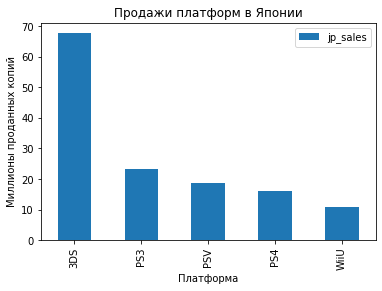

In [62]:
jp.plot(kind = 'bar', title='Продажи платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим диаграмму

<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px"> 
Рассмотрим ТОП-5 платформ<br> 

Во всех регионах входит платформы PS4, PS3 и 3DS.

В Северной Америке и Европе на 1 месте PS4, на 5 3DS. Рынки похожи, также присутствуют в обоих регионах в топ платформ XOne, X360 и PS3.

Япония существенно отличается: 1 место занимает 3DS (это 5 строка на предыдущих рассмотренных), платформа PSV на 3 месте и на 5 WiiU (эти платформы не встречались в ТОП-5 Северной Америки и Европы), на 4 месте знакомая PS4.

----

**Популярные жанры**

In [63]:
sales_genre = actual_period.pivot_table(index = 'genre' , 
                                 values = ['na_sales','eu_sales','jp_sales','total_sales'], aggfunc = 'sum')
sales_genre #создадим сводную таблицу продаж по жанрам в регионах

,eu_sales,jp_sales,na_sales,total_sales
genre,,,,
Action,118.13,40.49,126.05,321.87
Adventure,8.25,5.82,7.14,23.64
Fighting,8.55,7.65,15.55,35.31
Misc,20.04,9.20,27.49,62.82
Platform,15.58,4.79,18.14,42.63
Puzzle,1.00,1.18,0.83,3.17
Racing,20.19,2.30,12.96,39.89
Role-Playing,36.97,51.04,46.40,145.89
Shooter,87.86,6.61,109.74,232.98


In [64]:
na_genres = actual_period.pivot_table(index = 'genre' , values = 'na_sales', aggfunc = 'sum')
na = na_genres.sort_values('na_sales', ascending=False).head()
na
#ТОП-5 жанров в Северной Америке (миллионы проданных копий)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


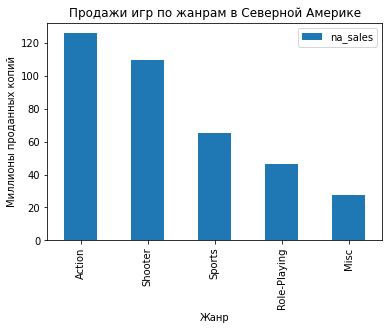

In [65]:
na.plot(kind = 'bar', title='Продажи игр по жанрам в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим диаграмму

In [66]:
eu_genres = actual_period.pivot_table(index = 'genre' , values = 'eu_sales', aggfunc = 'sum')
eu = eu_genres.sort_values('eu_sales', ascending=False).head()
eu
#ТОП-5 жанров в Европе (миллионы проданных копий)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


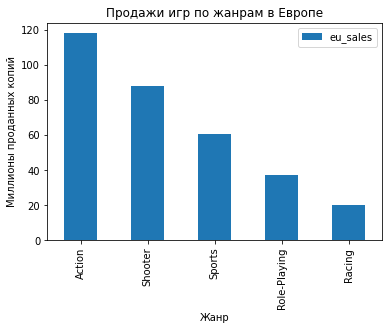

In [67]:
eu.plot(kind = 'bar', title='Продажи игр по жанрам в Европе')
plt.xlabel('Жанр')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим диаграмму

In [68]:
jp_genres = actual_period.pivot_table(index = 'genre' , values = 'jp_sales', aggfunc = 'sum')
jp = jp_genres.sort_values('jp_sales', ascending=False).head()
jp
#ТОП-5 жанров в Японии (миллионы проданных копий)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


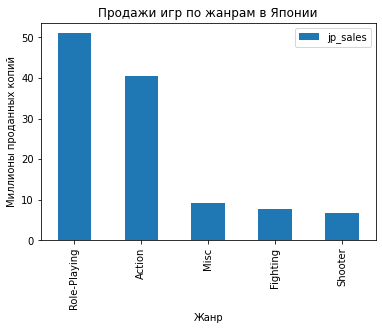

In [69]:
jp.plot(kind = 'bar', title='Продажи игр по жанрам в Японии')
plt.xlabel('Жанр')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим диаграмму

<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px"> 
Рассмотрим ТОП-5 жанров.<br>

Северная Америка: Action, Shooter, Sports, Role-playing, Misc. <br>
Европа: Action, Shooter, Sports, Role-playing, Racing. <br>
Япония: Role-playing, Action, Misc, Fighting, Shooter.

    
Очень похожи предпочтения пользователей Северной Америки и Европы. 
Отличаются только 5 строки в рейтинге, Misc и Racing соответственно.

В Японии рейтинг жанров возглавляет Role-Playing (4 место в предыдущих регионах),на 4 месте жанр Fighting, который не встречался в топ-5 Северной Америки и Европы. 

----

**Влияние рейтинга ESBR**

In [70]:
rating_sales = games.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
rating_sales = rating_sales[['na_sales', 'eu_sales', 'jp_sales']]
rating_sales #сводная таблица по рейтингам и продажам

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1295.55,710.52,199.57
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
M,748.48,483.97,64.24
RP,0.00,0.08,0.00
T,759.75,427.03,151.40
unknown,1240.68,613.30,841.93


In [71]:
na_rating_sales = rating_sales.pivot_table(index = 'rating', values = 'na_sales', aggfunc='sum')
na = na_rating_sales.sort_values('na_sales', ascending=False).head()
na #влияние рейтинга ESBR на продажи в Северной Америке (миллионы проданных копий)

,na_sales
rating,
E,1295.55
unknown,1240.68
T,759.75
M,748.48
E10+,353.32


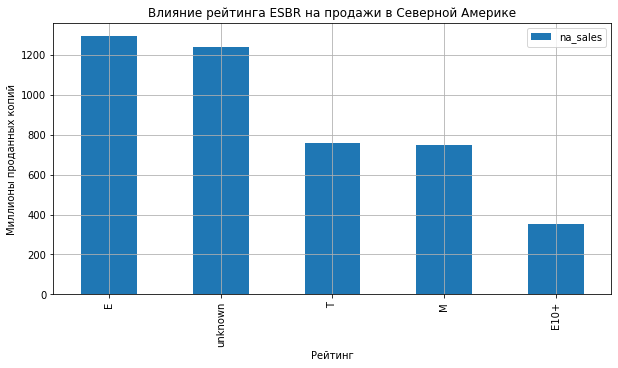

In [72]:
na.plot(kind = 'bar', y = 'na_sales', grid = True, figsize = (10, 5),\
                    title = 'Влияние рейтинга ESBR на продажи в Cеверной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим диаграмму

In [73]:
eu_rating_sales = rating_sales.pivot_table(index = 'rating', values = 'eu_sales', aggfunc='sum')
eu = eu_rating_sales.sort_values('eu_sales', ascending=False).head()
eu #влияние рейтинга ESBR на продажи в Европе (миллионы проданных копий)

,eu_sales
rating,
E,710.52
unknown,613.30
M,483.97
T,427.03
E10+,188.52


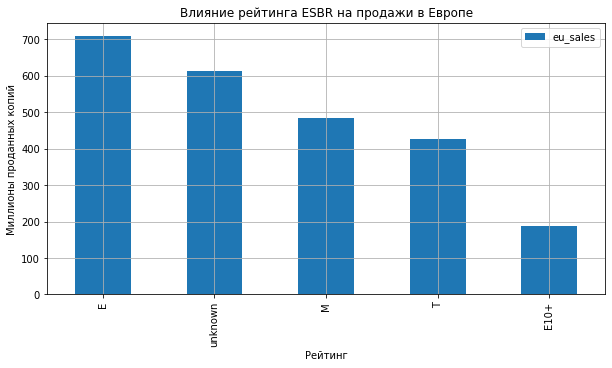

In [74]:
eu.plot(kind = 'bar', y = 'eu_sales', grid = True, figsize = (10, 5),\
                    title = 'Влияние рейтинга ESBR на продажи в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим диаграмму

In [75]:
jp_rating_sales = rating_sales.pivot_table(index = 'rating', values = 'jp_sales', aggfunc='sum')
jp = jp_rating_sales.sort_values('jp_sales', ascending=False).head()
jp #влияние рейтинга ESBR на продажи в Японии (миллионы проданных копий)

,jp_sales
rating,
unknown,841.93
E,199.57
T,151.40
M,64.24
E10+,40.20


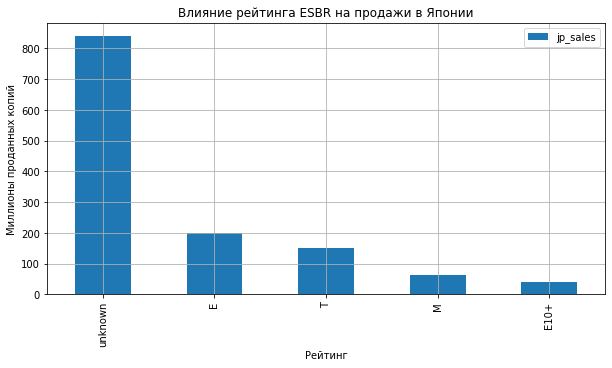

In [76]:
jp.plot(kind = 'bar', y = 'jp_sales', grid = True, figsize = (10, 5),\
                    title = 'Влияние рейтинга ESBR на продажи в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Миллионы проданных копий')
plt.show() #построим диаграмму

Продублируем расшифровку рейтинга:
- «E» («Everyone») — «Для всех»: содержание вполне подходит для всех возрастов (ранее с 6 лет)
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»: игра подходит для лиц от 13 лет
- «M» («Mature») — «Для взрослых»: материалы игры не подходят для лиц младше 17 лет
- «Unknown» — игры без рейтинга

Рейтинги по убыванию для каждого региона:

- Северная Америка: E, unknown, T, M, E10+

- Европа: E, unknown, M, T, E10+

- Япония: unknown, E, T, M, E10+ 

<div style="border:solid steelblue 2px; padding: 10px; border-radius: 5px"> 
Можем отметить схожесть регионов: <br>
- игры для лиц от 10 лет и старше на последнем месте <br>
- игры для взрослых и подростков с разной вариативностью на 3 и 4 местах
    
1 и 2 места в Северной Америке и Европе занимают игры для всех и без рейтинга.<br> 
В Японии самые популярные с существенным отрывом игры без рейтинга, на 2 месте игры для всех. 

### Проверка гипотез

**№1**   
Средние пользовательские рейтинги платформ XboxOne и PC одинаковые

H_0: Средние пользовательские рейтинги платформ XboxOne и PC равны

H_1: Средние пользовательские рейтинги платформ XboxOne и PC различаются

In [77]:
xone = actual_period.loc[actual_period['platform'] == "XOne",'user_score'].dropna()
pc = actual_period.loc[actual_period['platform'] == "PC",'user_score'].dropna()
#выберем нужные платформы

In [78]:
alpha = 0.05 

results = stats.ttest_ind(xone, pc, alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9299367079819425
Отвергаем нулевую гипотезу


In [79]:
print('Средний пользовательский рейтинг платформы XboxOne:', xone.mean().round(2))

Средний пользовательский рейтинг платформы XboxOne: 6.52


In [80]:
print('Средний пользовательский рейтинг платформы PC:', pc.mean().round(2))

Средний пользовательский рейтинг платформы PC: 6.27


По имеющимся данным отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ XboxOne и PC различаются, хотя и близки по значению.

**№2**<br>
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные <br>

H_0: Средние пользовательские рейтинги жанров Action и Sports равны<br>

H_1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [81]:
action = actual_period.loc[actual_period['genre'] == "Action",'user_score'].dropna()
sports = actual_period.loc[actual_period['genre'] == "Sports",'user_score'].dropna()
#выберем интересующие жанры

In [82]:
alpha = 0.05 

results = stats.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


In [83]:
print('Средний пользовательский рейтинг жанра Action:', action.mean().round(2))

Средний пользовательский рейтинг жанра Action: 6.84


In [84]:
print('Средний пользовательский рейтинг жанра Sports:', sports.mean().round(2))

Средний пользовательский рейтинг жанра Sports: 5.24


Отвергли нулевую теорию - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, рейтинг жанра Аction выше.

### Общий вывод

<div class="alert-info" style="padding: 20px; border-radius: 10px"> 
При подготовке данных привели названия столбцов к нижнему регистру.
    
Видим пропуски значений в названии, оценках и рейтинге. 
    
Удалим строки без названия игры, их всего 2, на общий анализ не повлияют, скорее всего человеческий фактор. Провели проверку на дубликаты.
    
Пропуски значений в столбце года выхода заполним 0, заполнение средним или медианным значением не даст информативности, заменили тип на целочисленные.
    
Отсутствие значений в оценках критиков и пользователей оставим, игру могли не оценивать, либо произошла ошибка при хранении или выгрузке данных. Сообщим коллегам.
    
Возможно, пропуски в последнем столбце связаны с тем, что организация ESRB была основана в 1994 году, поэтому отсутствуют данные по играм, которые вышли раньше.
Добавили столбец с общими продажами.
<dev>

<div class="alert-info" style="padding: 20px; border-radius: 10px"> 
Рост компьютерных игр заметен с 1997 года, <b>больше всего игр выходили в 2008 и 2009 годах.</b>
После этого периода идет плавное снижение, в 2011 падение более чем в 2 раза от пиковых значений. <br>


Среди платформ <b>явный лидер PS2</b> продажи 1255.77 млн.$, далее следуют X360, PS3, Wii, DS, PS. 
В среднем срок жизни платформы около 10 лет, далее устаревает и на смену приходят новые. <br> 


Для прогноза на 2017 взяли данные за последние 2-3 года, наблюдаем снижение продаж по всем платформам с 2015. 
В 2016 году можем рассматривать PS4, XOne и 3DS, как потенциально прибыльные.
На «ящике с усами» множество выбросов, возможно, некоторых игры игроки особенно ждали. Лидер X360, далее Wii, похожие результаты у PS4 и XOne, замыкает рейтинг топ-5 платформа WiiU.<br>

<b>Отзывы</b> пользователей на продажи не влияют. Корреляция между продажами платформ X360, XOne, PS3 и отзывами критиков средняя положительная. Отметим большее влияние на платформу XOne.<br>

Среди <b>жанров</b> компьютерных игр пятую часть от общего количества (из 12 представленных жанров) занимают игры жанра Action. На втором месте жанр Sports, на третьем Misc. Puzzle занимает всего 3%. 
Возглавляют продажи игр с жанрами Platform, Shooter и Role-playing. Наименьшие продажи у жанров Puzzle, Strategy и Adventure.
Удивительно, больше всего продаж у жанра Platform, в то время как количество игр чуть более 5% от общего числа.
Второе место у Shooter, составляет 8% от общего количества компьютерных игр.
Лидер по количеству игр в жанре Action занимает в продажах 7 место из 12.<br>


<b>ТОП-5 платформ.</b>
Во всех регионах входит платформы PS4, PS3 и 3DS.
В Северной Америке и Европе на 1 месте PS4, на 5 3DS. Рынки похожи, также присутствуют в обоих регионах в топ платформ XOne, X360 и PS3.
Япония существенно отличается: 1 место занимает 3DS (это 5 строка на предыдущих рассмотренных), платформа PSV на 3 месте и на 5 WiiU (эти платформы не встречались в ТОП-5 Северной Америки и Европы), на 4 месте знакомая PS4.<br>


<b>ТОП-5 жанров.</b>
Северная Америка: Action, Shooter, Sports, Role-playing, Misc. <br>
Европа: Action, Shooter, Sports, Role-playing, Racing. <br>
Япония: Role-playing, Action, Misc, Fighting, Shooter.

Очень похожи предпочтения пользователей Северной Америки и Европы. 
Отличаются только 5 строки в рейтинге, Misc и Racing соответственно.

В Японии рейтинг жанров возглавляет Role-Playing (4 место в предыдущих регионах),на 4 месте жанр Fighting, который не встречался в топ-5 Северной Америки и Европы.


Рассмотрев <b>рейтинг ESBR</b> выделили 5 основных, по убыванию для каждого региона:<br>
- Северная Америка: E, unknown, T, M, E10+
- Европа: E, unknown, M, T, E10+
- Япония: unknown, E, T, M, E10+<br>

Можем отметить схожесть регионов: <br>
- игры для лиц от 10 лет и старше на последнем месте <br>
- игры для взрослых и подростков с разной вариативностью на 3 и 4 местах
    
1 и 2 места в Северной Америке и Европе занимают игры для всех и без рейтинга.
В Японии самые популярные с существенным отрывом игры без рейтинга, на 2 месте игры для всех.<dev>

<div class="alert-info" style="padding: 20px; border-radius: 10px"> 
<b>Гипотезы</b> <br>
Отвергли гипотезу №1 о том, что  средние пользовательские рейтинги платформ XboxOne и PC равны.
Они различаются, хотя и близки по значению.
    
Отвергли гипотезу №2 о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны. Они различаются, а точнее рейтинг жанра Action выше.<dev>



<div class="alert-info" style="padding: 20px; border-radius: 10px"> 
В 2017 году <b>потенциально прибыльными</b> будут игры:
    
- на платформах PS4, XOne, X360, PS3 и 3DS
- в жанрах Action, Sports, Shooter, Misc и Role-Playing
- для возрастных всех возрастных групп, подростков и взрослых <dev>

<div class="alert-info" style="padding: 20px; border-radius: 10px"> 
<b>Рекомендации для магазина компьютерных игр для регионов</b>

Северная Америка:
- платформы PS4, XOne, X360, PS3, 3DS
- жанры Action, Shooter, Sports, Role-playing, Misc
- возрастной рейтинг E, T, M, E10+

    
Европа:
- платформы PS4, PS3, XOne, X360, 3DS
- жанры Action, Shooter, Sports, Role-playing, Racing
- возрастной рейтинг E, M, T, E10+ 
    

Япония:
- платформы 3DS, PS3, PSV, PS4, WiiU
- жанры Role-playing, Action, Misc, Fighting, Shooter
- возрастной рейтинг E, T, M, E10+
<dev>